# SVI Part II: Conditional Independence, Subsampling and Amortization

In [3]:
import torch 
import pyro
import pyro.distributions as D 
import pyro.distributions.constraints as C

In [6]:
data = torch.randint(0, 2, (10, )).type(torch.float)
data

tensor([0., 1., 1., 0., 1., 0., 1., 1., 1., 1.])

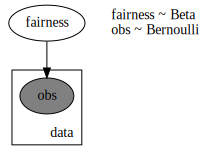

In [8]:
def model(data=None):
    alpha0 = torch.tensor(10.)
    beta0 = torch.tensor(10.)
    f = pyro.sample('fairness', D.Beta(alpha0, beta0))
    
    with pyro.plate('data', len(data)):
        return pyro.sample('obs', D.Bernoulli(f), obs=data)

pyro.render_model(model, (data, ), render_distributions=True)

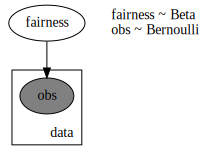

In [9]:
def model(data=None):
    alpha0 = torch.tensor(10.)
    beta0 = torch.tensor(10.)
    f = pyro.sample('fairness', D.Beta(alpha0, beta0))
    
    with pyro.plate('data', len(data), subsample_size=5) as ind:
        return pyro.sample('obs', D.Bernoulli(f), obs=data.index_select(0, ind))
    
pyro.render_model(model, (data, ), render_distributions=True)